In [2]:
import numpy as np
from hmmlearn import hmm



In [78]:
import numpy as np

# Load rewards data
rewards = np.loadtxt('rewards.txt', dtype=int)
print(rewards.shape)

(100,)


In [79]:
from hmmlearn import hmm

# Define the number of states and possible rewards
n_states = 9
n_rewards = 3

# Initialize the HMM model
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, tol=1e-4, verbose=True)

# Reshape the rewards data to fit the model
rewards = rewards.reshape(-1, 1)

# Fit the model to the rewards data
model.fit(rewards)

# Print the learned transition and emission probabilities
print("Learned transition probabilities:")
print(model.transmat_)
print("Learned emission probabilities:")
print(model.emissionprob_)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Learned transition probabilities:
[[6.80553497e-02 2.39558906e-01 1.28801080e-03 2.38826557e-04
  8.74080751e-02 1.68542648e-09 4.72337198e-03 5.98727458e-01
  9.72768443e-11]
 [6.81526010e-14 9.13557363e-10 2.06745376e-02 4.51195477e-02
  2.07476571e-08 8.95029482e-03 8.66022943e-02 7.53598061e-01
  8.50552433e-02]
 [1.42776119e-06 7.00475295e-04 3.25919352e-03 4.09684499e-07
  9.13200103e-04 8.34749157e-01 1.58578435e-01 9.85962087e-04
  8.11739344e-04]
 [3.94805468e-01 1.38683749e-02 5.35443157e-02 1.62382992e-02
  3.22158448e-05 4.52806928e-01 3.81603639e-02 3.05440338e-02
  1.06551412e-16]
 [9.40096174e-03 4.35217183e-08 2.22431726e-04 5.69725910e-01
  2.32287338e-02 4.83401744e-04 7.44066187e-03 2.11949715e-01
  1.77548141e-01]
 [1.78269049e-01 2.87011553e-09 6.76660633e-02 7.51097200e-01
  2.91385861e-10 1.05946483e-07 1.19925602e-08 2.43281947e-03
  5.34747783e-04]
 [3.21630654e-07 5.06364341e-05 2.65677242e-02 2.52304832e-02
  3.82735373e-11 8.90385594e-01 2.10612286e-03 2.206

         1       0.00000000             +nan
         2       0.00000000      -0.00000000


In [57]:
# Map rewards to ensure they are properly encoded
reward_mapping = {0: 0, 1: 1, 2: 2}  # Map rewards explicitly
rewards_data = np.vectorize(reward_mapping.get)(rewards_data)

# Verify the mapping
print("Mapped rewards_data:", np.unique(rewards_data))


Mapped rewards_data: [0 1 2]


Formatted data shape: (103, 1)
Unique values in formatted_data: [0 1 2]


In [74]:
from hmmlearn import hmm

n_states = 9  # Number of states in the 3x3 grid
n_observations = 3  # Possible rewards: 0, 1, 2

model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, tol=1e-4, random_state=42)
model.n_features = n_observations

# Step 4: Fit the HMM to the rewards data
model.fit(one_hot_rewards)

# Step 5: Extract the learned parameters
learned_start_probs = model.startprob_  # Start probabilities
learned_trans_probs = model.transmat_   # Transition probabilities
learned_emission_probs = model.emissionprob_  # Emission probabilities

# Step 6: Display the results
print("Learned Start Probabilities:\n", learned_start_probs)
print("\nLearned Transition Probabilities:\n", learned_trans_probs)
print("\nLearned Emission Probabilities:\n", learned_emission_probs)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: Symbol counts should be nonnegative integers

In [80]:
# Check the inferred number of features
print("Number of features (n_features):", model.n_features)  # Should be 

print("Emission Probabilities:")
for state_idx, probs in enumerate(model.emissionprob_):
    print(f"State {state_idx}: {probs} (Sum = {np.sum(probs)})")


Number of features (n_features): 1
Emission Probabilities:
State 0: [1.] (Sum = 1.0)
State 1: [1.] (Sum = 1.0)
State 2: [1.] (Sum = 1.0)
State 3: [1.] (Sum = 1.0)
State 4: [1.] (Sum = 1.0)
State 5: [1.] (Sum = 1.0)
State 6: [1.] (Sum = 1.0)
State 7: [1.] (Sum = 1.0)
State 8: [1.] (Sum = 1.0)


In [81]:
# Check overall distribution of rewards
unique, counts = np.unique(rewards_data, return_counts=True)
print("Reward Distribution:", dict(zip(unique, counts)))

# Get the most likely sequence of states using Viterbi
logprob, predicted_states = model.decode(rewards_data, algorithm="viterbi")

# Display the predicted states
print("Predicted States:", predicted_states)

# Check reward distribution for each state
for state in range(9):
    state_rewards = rewards_data[np.where(predicted_states == state)]
    unique, counts = np.unique(state_rewards, return_counts=True)
    print(f"State {state} Reward Distribution:", dict(zip(unique, counts)))


Reward Distribution: {0: 17, 1: 71, 2: 12}
Predicted States: [0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0
 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7
 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7]
State 0 Reward Distribution: {0: 17, 1: 33}
State 1 Reward Distribution: {}
State 2 Reward Distribution: {}
State 3 Reward Distribution: {}
State 4 Reward Distribution: {}
State 5 Reward Distribution: {}
State 6 Reward Distribution: {}
State 7 Reward Distribution: {1: 38, 2: 12}
State 8 Reward Distribution: {}


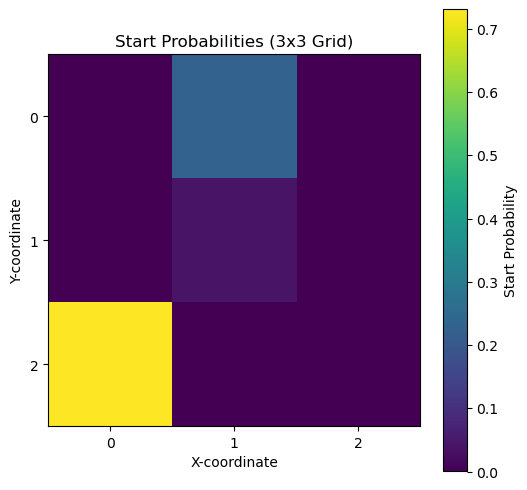

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the start probabilities to a 3x3 grid
start_probs_grid = learned_start_probs.reshape((3, 3))

# Plot the heatmap
plt.figure(figsize=(6, 6))
plt.imshow(start_probs_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Start Probability')
plt.title('Start Probabilities (3x3 Grid)')
plt.xticks(range(3), ['0', '1', '2'])
plt.yticks(range(3), ['0', '1', '2'])
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()


In [39]:
print("Number of features (n_features):", model.n_features)

print("Shape of rewards_data:", rewards_data.shape)
print("Unique values in rewards_data:", np.unique(rewards_data))

# Ensure the data is integers in the range [0, 2]
rewards_data = np.clip(rewards_data, 0, 2).astype(int)
print("Fixed unique values:", np.unique(rewards_data))


Number of features (n_features): 1
Shape of rewards_data: (100, 1)
Unique values in rewards_data: [0 1 2]
Fixed unique values: [0 1 2]


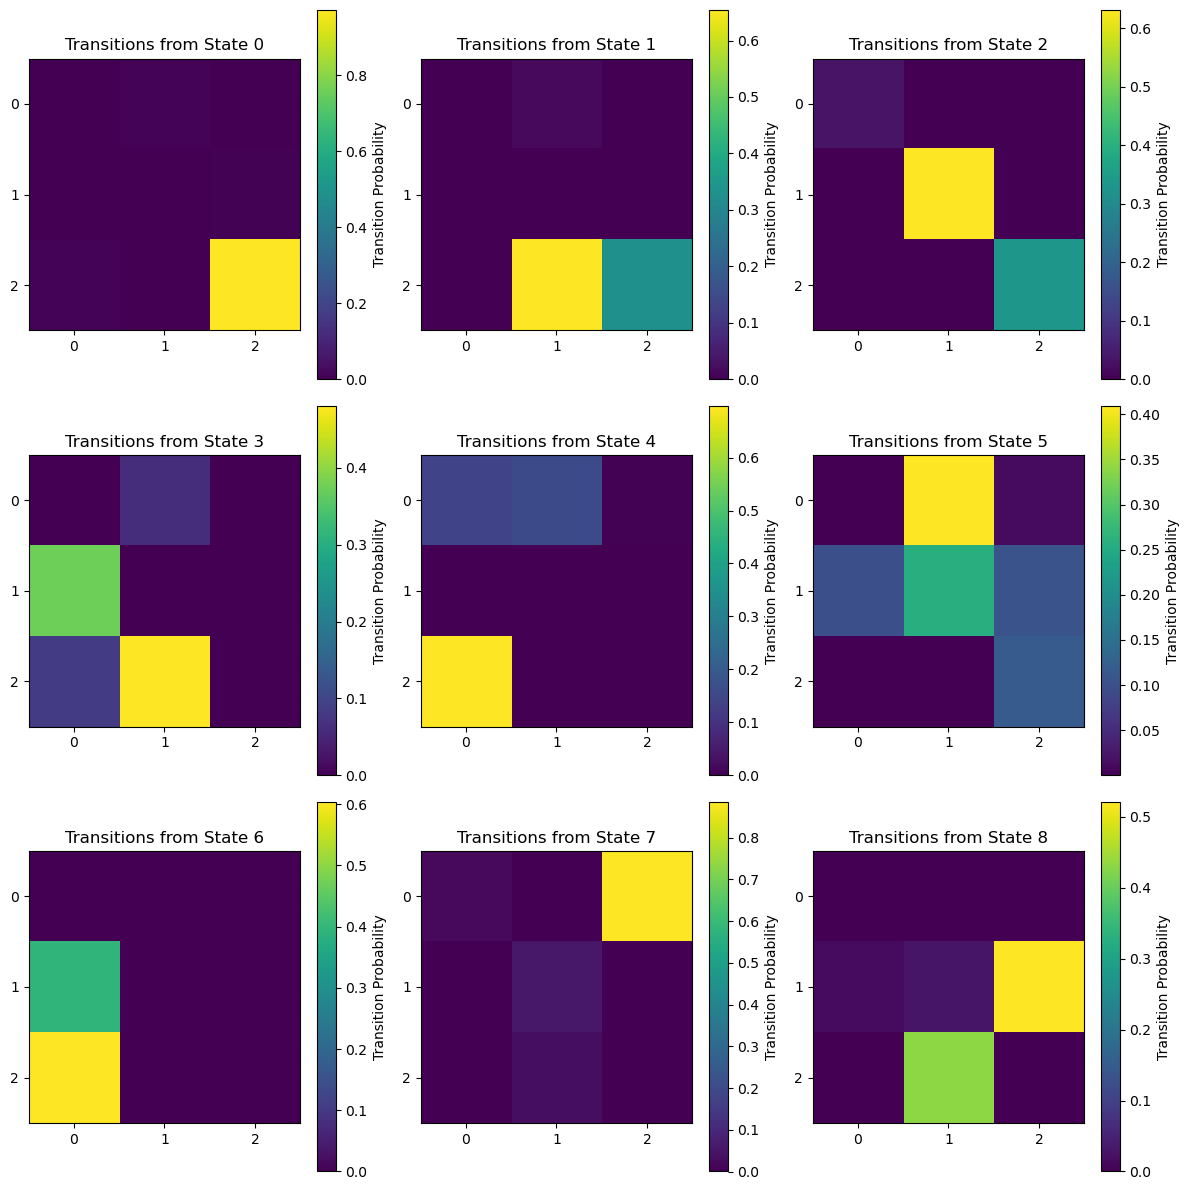

In [17]:
# Plot transition probabilities
plt.figure(figsize=(12, 12))
for i in range(9):  # There are 9 states in the grid
    plt.subplot(3, 3, i + 1)
    plt.imshow(learned_trans_probs[i].reshape((3, 3)), cmap='viridis', interpolation='nearest')
    plt.title(f'Transitions from State {i}')
    plt.colorbar(label='Transition Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.yticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()


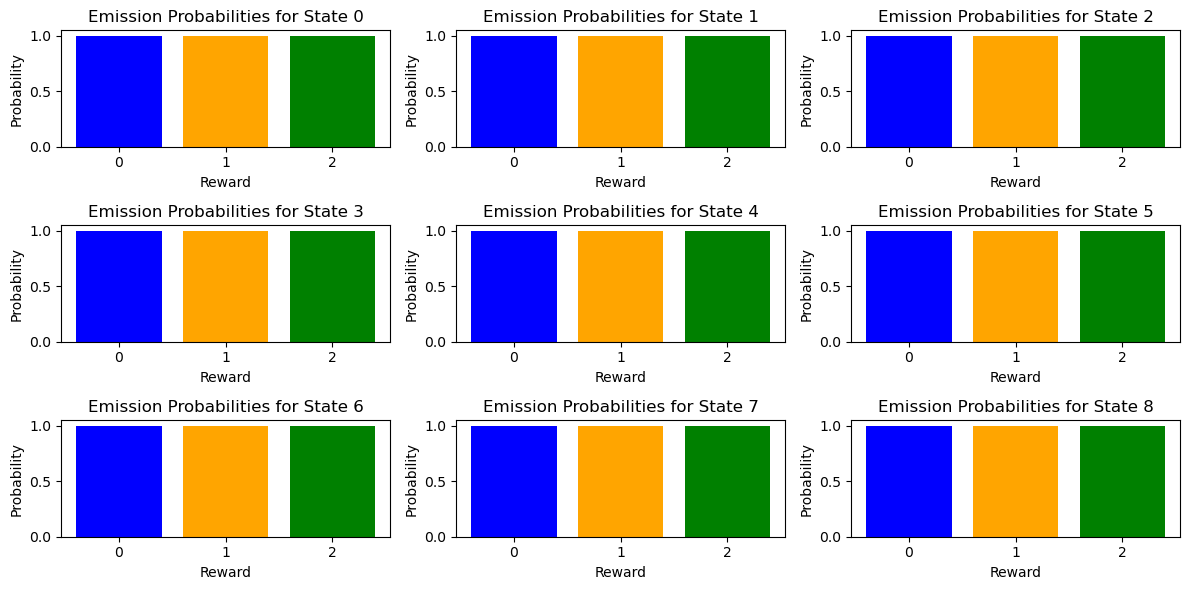

In [82]:
# Plot emission probabilities
plt.figure(figsize=(12, 6))
for i in range(9):  # There are 9 states in the grid
    plt.subplot(3, 3, i + 1)
    plt.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    plt.title(f'Emission Probabilities for State {i}')
    plt.xlabel('Reward')
    plt.ylabel('Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()


In [30]:
# Print emission probabilities for all states
print("Emission Probabilities:")
for state_idx, probs in enumerate(learned_emission_probs):
    print(f"State {state_idx}: {probs} (Sum = {np.sum(probs)})")


Emission Probabilities:
State 0: [1.] (Sum = 1.0)
State 1: [1.] (Sum = 1.0)
State 2: [1.] (Sum = 1.0)
State 3: [1.] (Sum = 1.0)
State 4: [1.] (Sum = 1.0)
State 5: [1.] (Sum = 1.0)
State 6: [1.] (Sum = 1.0)
State 7: [1.] (Sum = 1.0)
State 8: [1.] (Sum = 1.0)


In [31]:
print("Emission Probabilities Comparison:")
for state_idx in range(len(learned_emission_probs)):
    print(f"State {state_idx}: {learned_emission_probs[state_idx]}")


Emission Probabilities Comparison:
State 0: [1.]
State 1: [1.]
State 2: [1.]
State 3: [1.]
State 4: [1.]
State 5: [1.]
State 6: [1.]
State 7: [1.]
State 8: [1.]


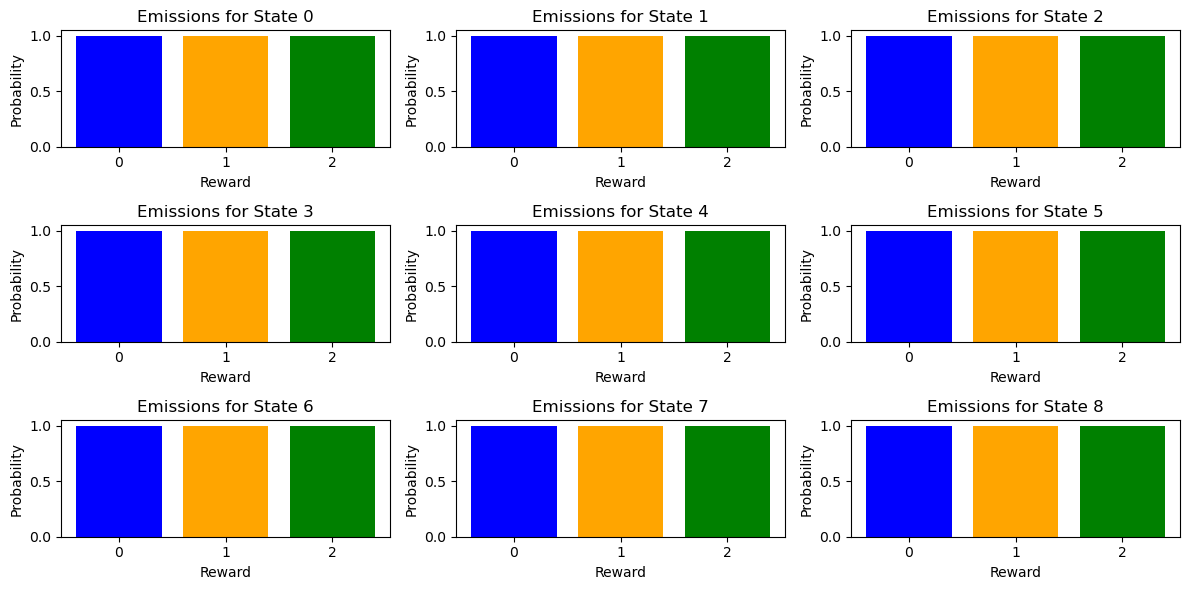

In [33]:
import matplotlib.pyplot as plt

# Plot emission probabilities as bar charts for each state
plt.figure(figsize=(12, 6))
for i in range(len(learned_emission_probs)):  # Iterate through all states
    plt.subplot(3, 3, i + 1)
    plt.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    plt.title(f'Emissions for State {i}')
    plt.xlabel('Reward')
    plt.ylabel('Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()


In [34]:
# Check the number of features (observations)
print("Number of observations (n_features):", model.n_features)


Number of observations (n_features): 1


In [19]:
# Print Start Probabilities
print("Start Probabilities (decimal):")
for i, prob in enumerate(learned_start_probs):
    print(f"State {i}: {prob:.6f}")

# Check if they sum to 1
print("\nSum of Start Probabilities:", np.sum(learned_start_probs))


Start Probabilities (decimal):
State 0: 0.000552
State 1: 0.229671
State 2: 0.000000
State 3: 0.000000
State 4: 0.039008
State 5: 0.000000
State 6: 0.730682
State 7: 0.000001
State 8: 0.000085

Sum of Start Probabilities: 1.0


In [20]:
# Print Transition Probabilities
print("\nTransition Probabilities (decimal):")
for i, row in enumerate(learned_trans_probs):
    print(f"From State {i}: {['{:.6f}'.format(p) for p in row]}")

# Check if rows sum to 1
row_sums = learned_trans_probs.sum(axis=1)
print("\nRow sums for Transition Probabilities:", row_sums)

# Print Emission Probabilities
print("\nEmission Probabilities (decimal):")
for i, row in enumerate(learned_emission_probs):
    print(f"State {i}: {['{:.6f}'.format(p) for p in row]}")

# Check if rows sum to 1
row_sums = learned_emission_probs.sum(axis=1)
print("\nRow sums for Emission Probabilities:", row_sums)



Transition Probabilities (decimal):
From State 0: ['0.000429', '0.009842', '0.000013', '0.000699', '0.000000', '0.007360', '0.009236', '0.000000', '0.972421']
From State 1: ['0.000011', '0.016078', '0.000000', '0.000000', '0.000003', '0.000014', '0.002134', '0.654205', '0.327556']
From State 2: ['0.033435', '0.000000', '0.000000', '0.000693', '0.631382', '0.000037', '0.000000', '0.000000', '0.334452']
From State 3: ['0.000000', '0.062116', '0.000138', '0.374785', '0.000067', '0.000038', '0.082606', '0.480249', '0.000000']
From State 4: ['0.139962', '0.157752', '0.004777', '0.000000', '0.000000', '0.000049', '0.696915', '0.000541', '0.000003']
From State 5: ['0.000010', '0.409003', '0.011742', '0.100078', '0.257413', '0.104381', '0.000024', '0.000001', '0.117348']
From State 6: ['0.000000', '0.000213', '0.000000', '0.394242', '0.001509', '0.000062', '0.602938', '0.001030', '0.000007']
From State 7: ['0.023963', '0.000000', '0.884133', '0.000000', '0.057740', '0.000005', '0.000254', '0.

Start Probabilities (3x3 Grid):
[[5.52108802e-04 2.29671420e-01 2.08510523e-07]
 [2.86432391e-11 3.90083643e-02 2.52581416e-15]
 [7.30682052e-01 8.26839540e-07 8.50188454e-05]]

Sum of Start Probabilities: 1.0


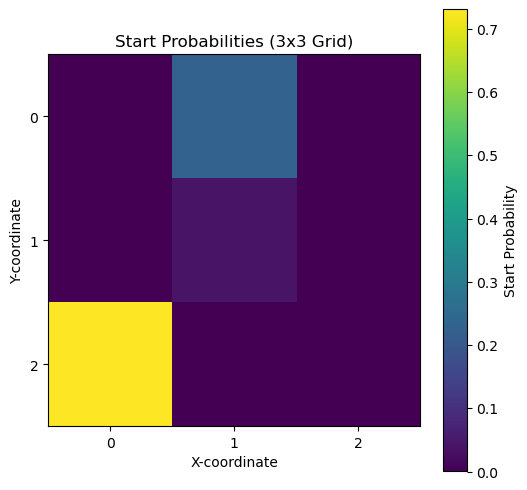

In [21]:
# Reshape start probabilities into a 3x3 grid
start_probs_grid = learned_start_probs.reshape((3, 3))

# Print as a table
print("Start Probabilities (3x3 Grid):")
print(start_probs_grid)

# Verify the sum of start probabilities
print("\nSum of Start Probabilities:", np.sum(learned_start_probs))

# Visualize as a heatmap
plt.figure(figsize=(6, 6))
plt.imshow(start_probs_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Start Probability')
plt.title('Start Probabilities (3x3 Grid)')
plt.xticks(range(3), ['0', '1', '2'])
plt.yticks(range(3), ['0', '1', '2'])
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()


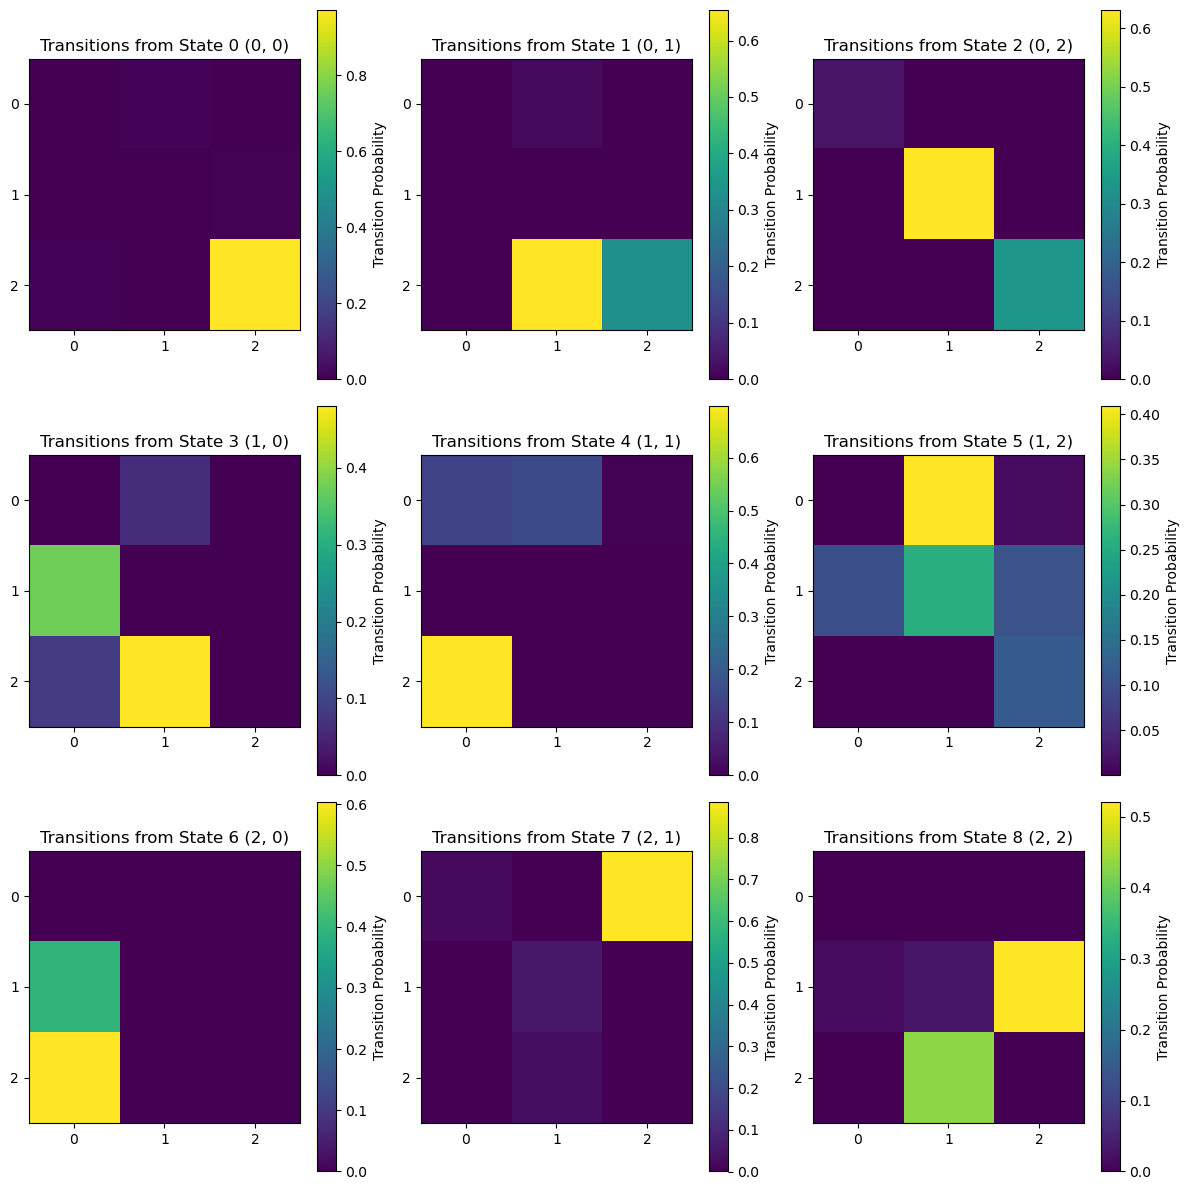

In [22]:
# Plot transition probabilities
plt.figure(figsize=(12, 12))
for i in range(9):  # For each state
    plt.subplot(3, 3, i + 1)
    grid = learned_trans_probs[i].reshape((3, 3))  # Reshape to 3x3
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Transition Probability')
    plt.title(f'Transitions from State {i} ({i//3}, {i%3})')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.yticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()


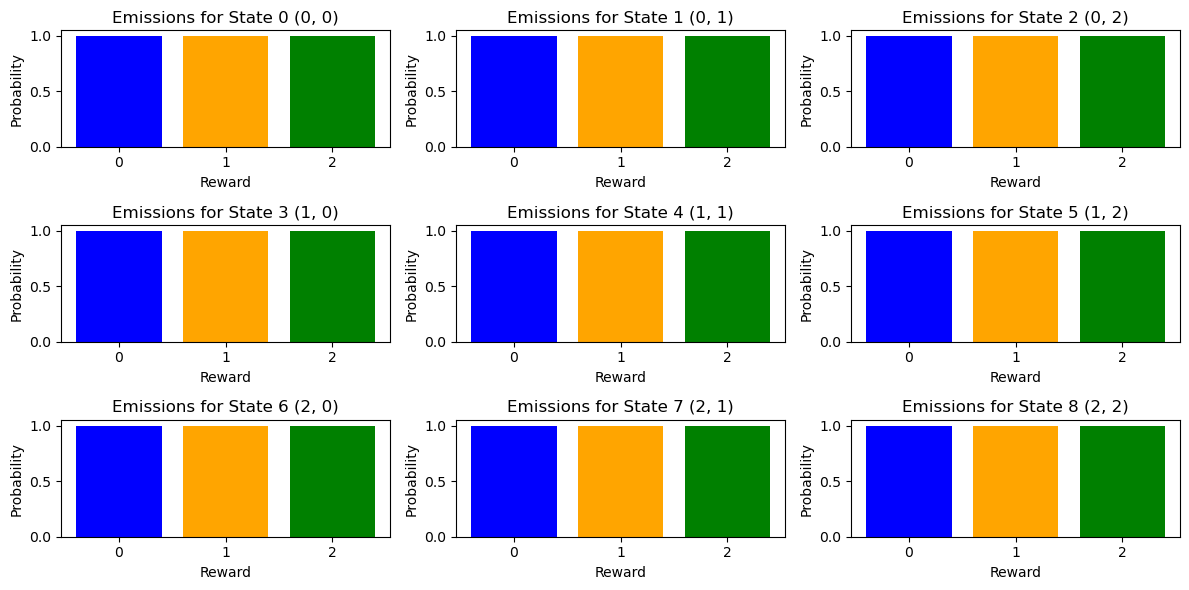


Row sums for Emission Probabilities (should be close to 1): [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# Print emission probabilities as a table (3x3 grid of bar charts)
plt.figure(figsize=(12, 6))
for i in range(9):  # For each state
    plt.subplot(3, 3, i + 1)
    plt.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    plt.title(f'Emissions for State {i} ({i//3}, {i%3})')
    plt.xlabel('Reward')
    plt.ylabel('Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()

# Verify that each row of the emission matrix sums to 1
row_sums = learned_emission_probs.sum(axis=1)
print("\nRow sums for Emission Probabilities (should be close to 1):", row_sums)


In [26]:
unique, counts = np.unique(rewards_data, return_counts=True)
print("Reward Distribution:", dict(zip(unique, counts)))


Reward Distribution: {0: 17, 1: 71, 2: 12}


Reward Distribution: {0: 17, 1: 71, 2: 12}


NameError: name 'predicted_states' is not defined

In [58]:
import numpy as np

# Define the 3x3 grid structure
grid = [(x, y) for x in range(3) for y in range(3)]

# Helper function to determine valid neighbors for a given state
def valid_neighbors(state_idx):
    x, y = grid[state_idx]
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
        nx, ny = x + dx, y + dy
        if 0 <= nx < 3 and 0 <= ny < 3:  # Ensure within bounds
            neighbors.append(grid.index((nx, ny)))
    return neighbors

# Construct the true transition matrix
n_states = 9
true_trans_probs = np.zeros((n_states, n_states))

for state_idx in range(n_states):
    neighbors = valid_neighbors(state_idx)
    prob = 1 / len(neighbors)  # Equal probability for each neighbor
    for neighbor_idx in neighbors:
        true_trans_probs[state_idx, neighbor_idx] = prob

# Print the true transition matrix
print("True Transition Matrix:")
print(true_trans_probs)


True Transition Matrix:
[[0.         0.5        0.         0.5        0.         0.
  0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.5
  0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.        ]
 [0.         0.25       0.         0.25       0.         0.25
  0.         0.25       0.        ]
 [0.         0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.33333333]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.        ]
 [0.         0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.33333333]
 [0.         0.         0.         0.         0.         0.5
  0.         0.5        0.        ]]


In [59]:
from hmmlearn import hmm

# Define the HMM
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, tol=1e-4, random_state=42)

# Set the true transition matrix
model.transmat_ = true_trans_probs

# Prevent the model from updating transitions or start probabilities
model.params = "e"  # Only learn emission probabilities
model.init_params = "e"  # Do not reinitialize transition or start probabilities


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [60]:
# Ensure rewards_data is properly formatted
rewards_data = rewards_data.reshape(-1, 1)  # Shape should be (n_samples, 1)

# Fit the model
model.fit(rewards_data)

# Extract learned emission probabilities
learned_emission_probs = model.emissionprob_
print("Learned Emission Probabilities:")
for state_idx, probs in enumerate(learned_emission_probs):
    print(f"State {state_idx}: {probs} (Sum = {np.sum(probs)})")


Learned Emission Probabilities:
State 0: [1.] (Sum = 1.0)
State 1: [1.] (Sum = 1.0)
State 2: [1.] (Sum = 1.0)
State 3: [1.] (Sum = 1.0)
State 4: [1.] (Sum = 1.0)
State 5: [1.] (Sum = 1.0)
State 6: [1.] (Sum = 1.0)
State 7: [1.] (Sum = 1.0)
State 8: [1.] (Sum = 1.0)


In [61]:
print("Transition Matrix After Training (Should Be Unchanged):")
print(model.transmat_)


Transition Matrix After Training (Should Be Unchanged):
[[0.         0.5        0.         0.5        0.         0.
  0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.5
  0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.        ]
 [0.         0.25       0.         0.25       0.         0.25
  0.         0.25       0.        ]
 [0.         0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.33333333]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.        ]
 [0.         0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.33333333]
 [0.         0.         0.         0.         0.         0.5
  0.         0.5        0.        ]]


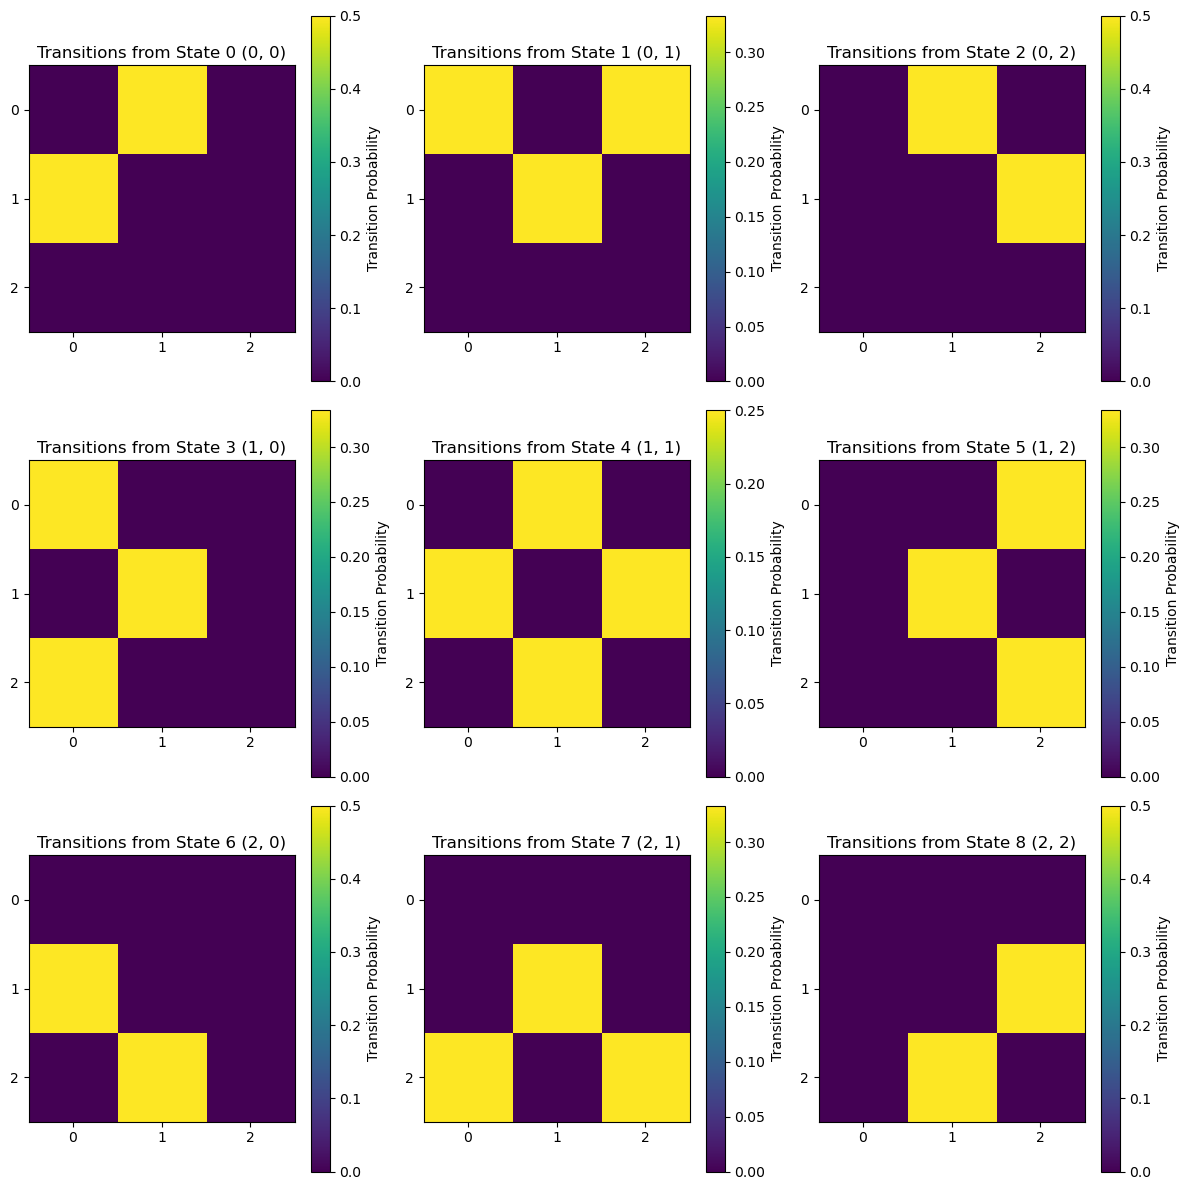

In [62]:
import matplotlib.pyplot as plt

# Visualize the fixed transition probabilities
plt.figure(figsize=(12, 12))
for i in range(n_states):  # For each state (0 to 8 in a 3x3 grid)
    plt.subplot(3, 3, i + 1)
    grid = true_trans_probs[i].reshape((3, 3))  # Reshape to 3x3 grid
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Transition Probability')
    plt.title(f'Transitions from State {i} ({i//3}, {i%3})')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.yticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()


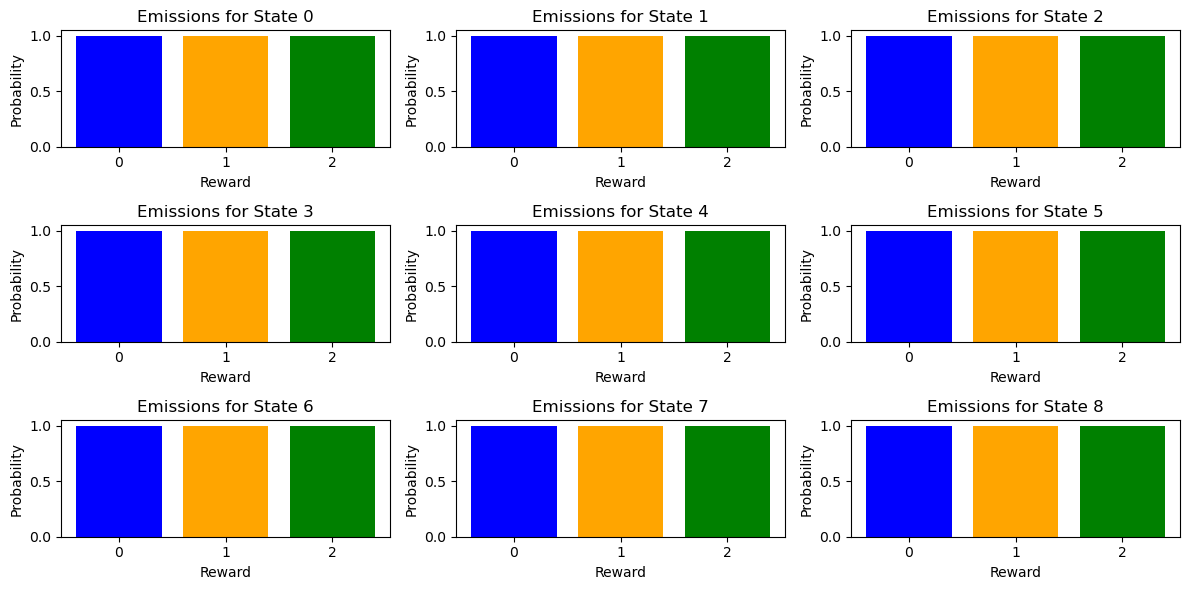

In [63]:
# Visualize the emission probabilities for each state
plt.figure(figsize=(12, 6))
for i in range(n_states):  # Iterate through all states
    plt.subplot(3, 3, i + 1)
    plt.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    plt.title(f'Emissions for State {i}')
    plt.xlabel('Reward')
    plt.ylabel('Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()


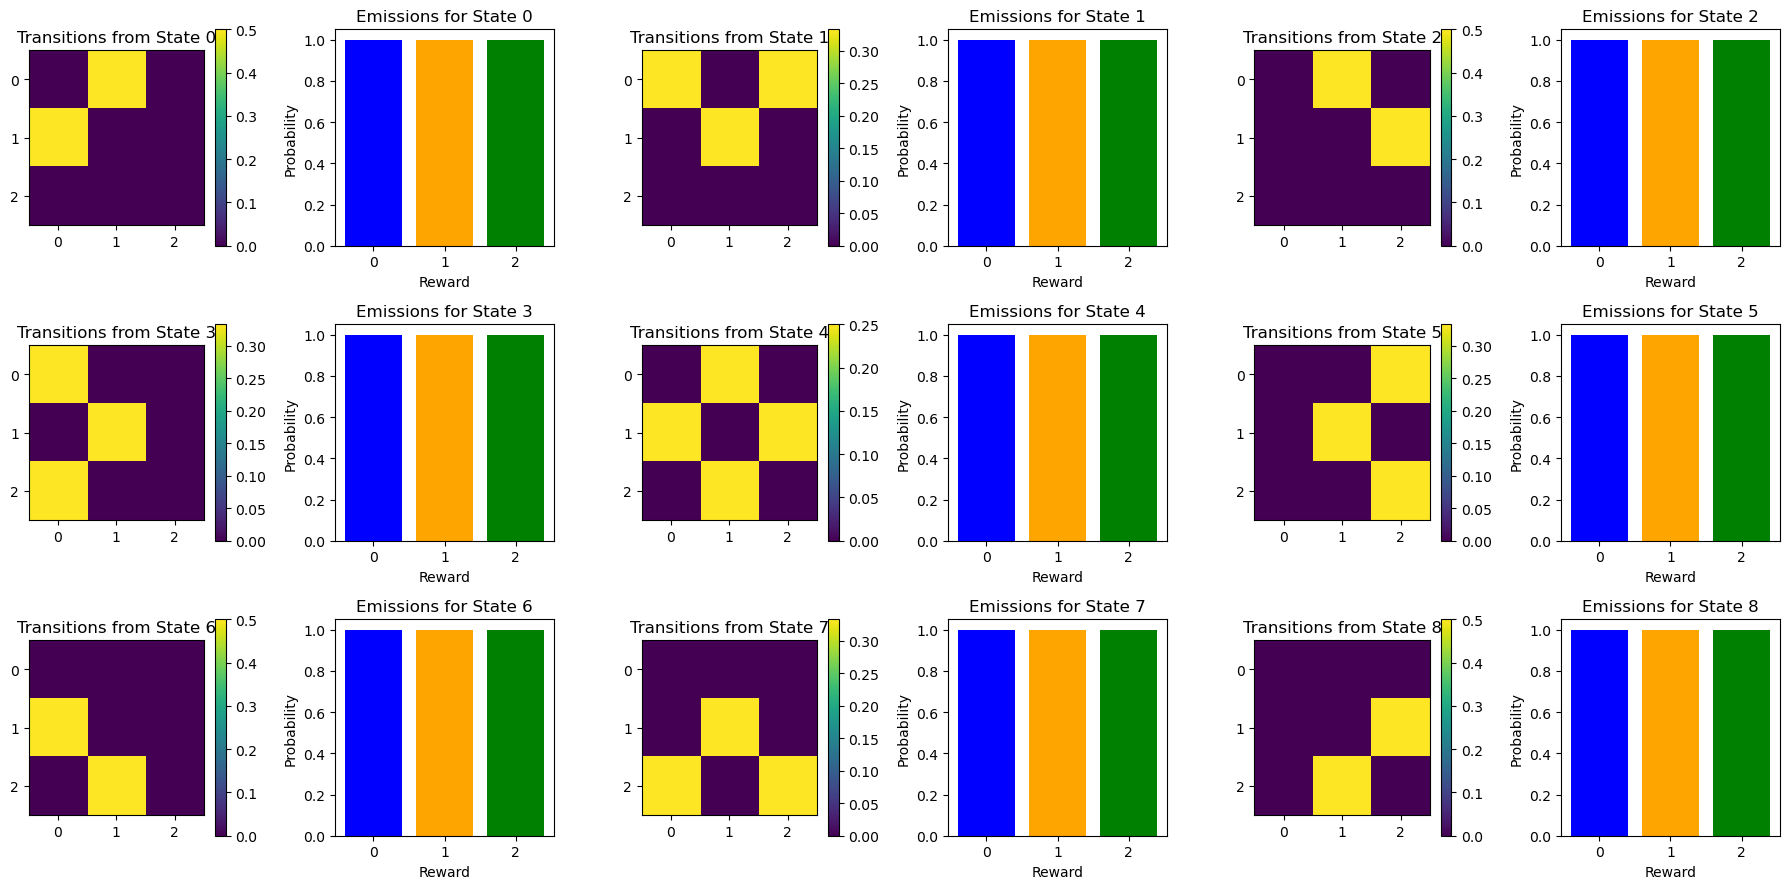

In [64]:
# Combined visualization of transitions and emissions
fig, axs = plt.subplots(3, 6, figsize=(18, 9))

for i in range(n_states):
    # Transition probabilities (heatmap)
    ax = axs[i // 3, 2 * (i % 3)]  # Grid for transitions
    grid = true_trans_probs[i].reshape((3, 3))
    im = ax.imshow(grid, cmap='viridis', interpolation='nearest')
    ax.set_title(f'Transitions from State {i}')
    ax.set_xticks(range(3))
    ax.set_yticks(range(3))
    plt.colorbar(im, ax=ax)

    # Emission probabilities (bar chart)
    ax = axs[i // 3, 2 * (i % 3) + 1]  # Grid for emissions
    ax.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    ax.set_title(f'Emissions for State {i}')
    ax.set_xlabel('Reward')
    ax.set_ylabel('Probability')
    ax.set_xticks(range(3))
    ax.set_xticklabels(['0', '1', '2'])

plt.tight_layout()
plt.show()


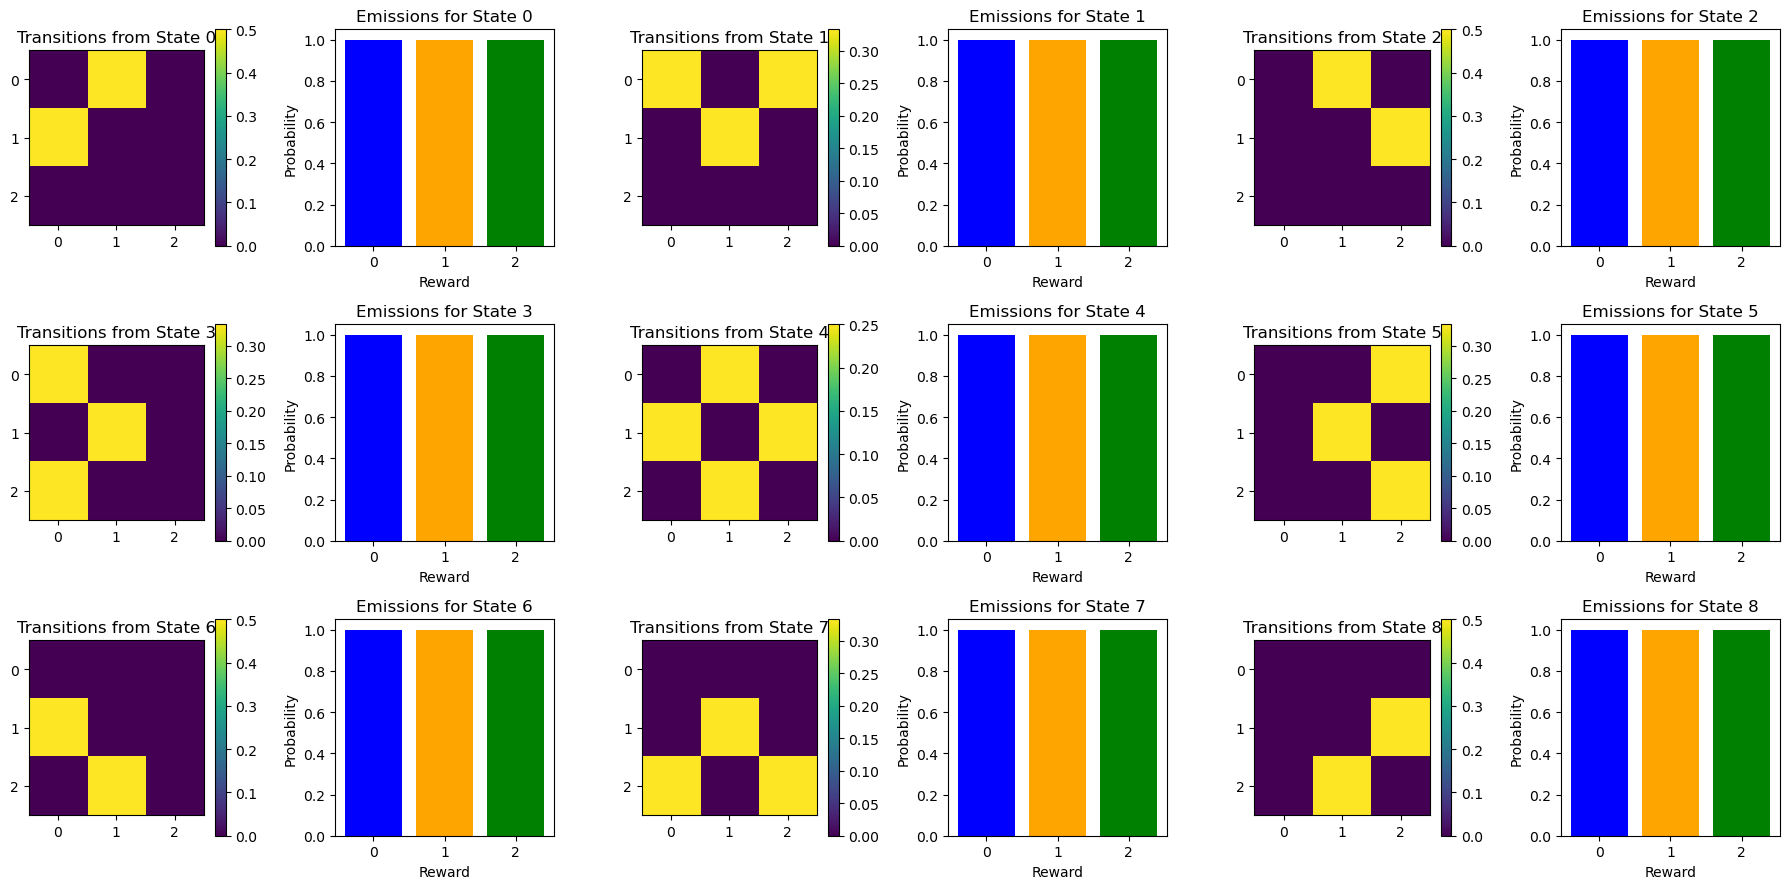

In [65]:
# Combined visualization of transitions and emissions
fig, axs = plt.subplots(3, 6, figsize=(18, 9))

for i in range(n_states):
    # Transition probabilities (heatmap)
    ax = axs[i // 3, 2 * (i % 3)]  # Grid for transitions
    grid = true_trans_probs[i].reshape((3, 3))
    im = ax.imshow(grid, cmap='viridis', interpolation='nearest')
    ax.set_title(f'Transitions from State {i}')
    ax.set_xticks(range(3))
    ax.set_yticks(range(3))
    plt.colorbar(im, ax=ax)

    # Emission probabilities (bar chart)
    ax = axs[i // 3, 2 * (i % 3) + 1]  # Grid for emissions
    ax.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    ax.set_title(f'Emissions for State {i}')
    ax.set_xlabel('Reward')
    ax.set_ylabel('Probability')
    ax.set_xticks(range(3))
    ax.set_xticklabels(['0', '1', '2'])

plt.tight_layout()
plt.show()
